<>:46: SyntaxWarning: invalid escape sequence '\p'
<>:46: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Рычков Ярослав\AppData\Local\Temp\ipykernel_1856\1355038082.py:46: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(t_plot,f_plot,label='$f(t) = cos(\pi t / 4)$',color='purple')


Сравнение значений:
 t_i  |   f(t_i)  |  f_int(t_i) | Разница
0.250 | 0.980785  | 0.980785    | 0.000000
0.375 | 0.956940  | 0.956940    | 0.000000
0.500 | 0.923880  | 0.923880    | 0.000000
0.625 | 0.881921  | 0.881921    | 0.000000
0.750 | 0.831470  | 0.831470    | 0.000000


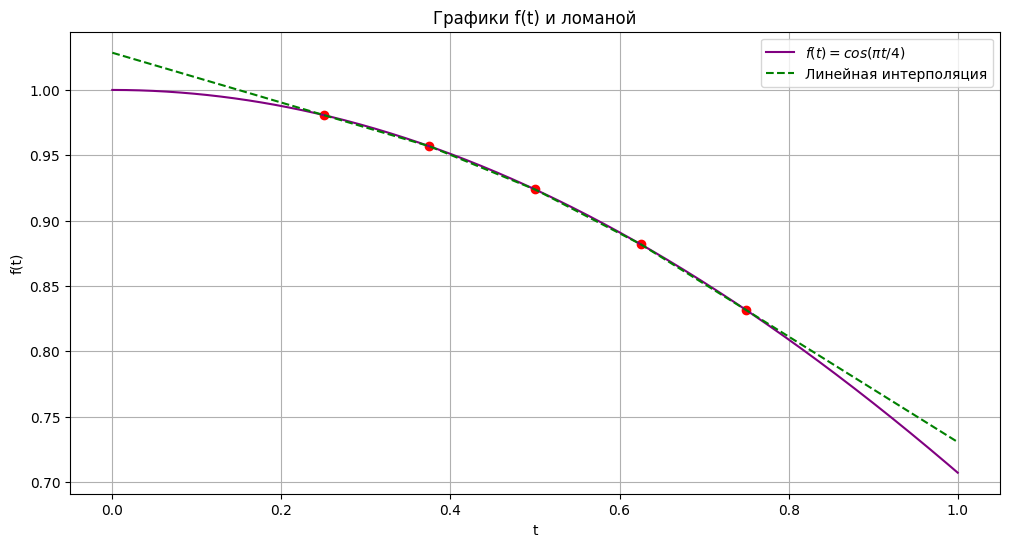

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

#заданная функция
def f(t):
    return np.cos(np.pi * t / 4)

#заданные моменты времени t_i
t_i = np.array([(i + 2)/8 for i in range(5)])
f_i = f(t_i) 

#линейная интерполяция
def inter(t,t_p,f_p):
    #экстраполяция влево(t < t_p[0])
    if t <= t_p[0]:
        k = (f_p[1] - f_p[0])/(t_p[1] - t_p[0])
        return f_p[0] + k*(t - t_p[0])
    #экстраполяция вправо(t > t_p[-1])
    elif t >= t_p[-1]:
        k = (f_p[-1] - f_p[-2])/(t_p[-1] - t_p[-2])
        return f_p[-1] + k*(t - t_p[-1])
    #интерполяция
    else:
        for i in range(len(t_p) - 1):
            if t_p[i] <= t <= t_p[i+1]:
                k = (f_p[i+1] - f_p[i])/(t_p[i+1] - t_p[i])
                return f_p[i] + k * (t - t_p[i])
    return None  #если t вне диапазона


print('Сравнение значений:')
print(' t_i  |   f(t_i)  |  f_int(t_i) | Разница')
for t in t_i:
    f_real = f(t)
    f_interp = inter(t,t_i,f_i)
    diff = abs(f_real - f_interp)
    print(f'{t:.3f} | {f_real:.6f}  | {f_interp:.6f}    | {diff:.6f}')

#графики
t_plot = np.linspace(0,1,500)
f_plot = f(t_plot)
f_int = np.array([inter(t,t_i,f_i) for t in t_plot])

plt.figure(figsize=(12,6))
plt.plot(t_plot,f_plot,label='$f(t) = cos(\pi t / 4)$',color='purple')
plt.plot(t_plot,f_int,label='Линейная интерполяция',color='green',linestyle='--')
plt.scatter(t_i,f_i,color='red')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Графики f(t) и ломаной')
plt.legend()
plt.grid(True)
plt.show()

### Вывод: Различия минимальны вблизи точек t_i (поскольку интерполяция точно проходит через них).Наибольшие отклонения — в середине между узлами. Косинус — нелинейная функция, и его график между узлами t_i не совпадает с прямой, соединяющей точки. Погрешность ∣f(t)−f(t_i)∣ растет по мере удаления от узлов  t_i, достигая максимума посередине между ними. Косинус — нелинейная функция, а линейная интерполяция аппроксимирует её ломаной. Чем выше кривизна (чем больше ∣f′′(t)∣), тем хуже приближение

Сравнение значений:
 t_i  |   f(t_i)  |  f_int(t_i) | L(t_i) (Лагранж)
0.250 | 0.980785  | 0.980785    | 0.980785
0.375 | 0.956940  | 0.956940    | 0.956940
0.500 | 0.923880  | 0.923880    | 0.923880
0.625 | 0.881921  | 0.881921    | 0.881921
0.750 | 0.831470  | 0.831470    | 0.831470


<>:14: SyntaxWarning: invalid escape sequence '\p'
<>:14: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Рычков Ярослав\AppData\Local\Temp\ipykernel_1856\3283542277.py:14: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(t_plot,f(t_plot),label='$f(t) = cos(\pi t / 4)$',color='red')


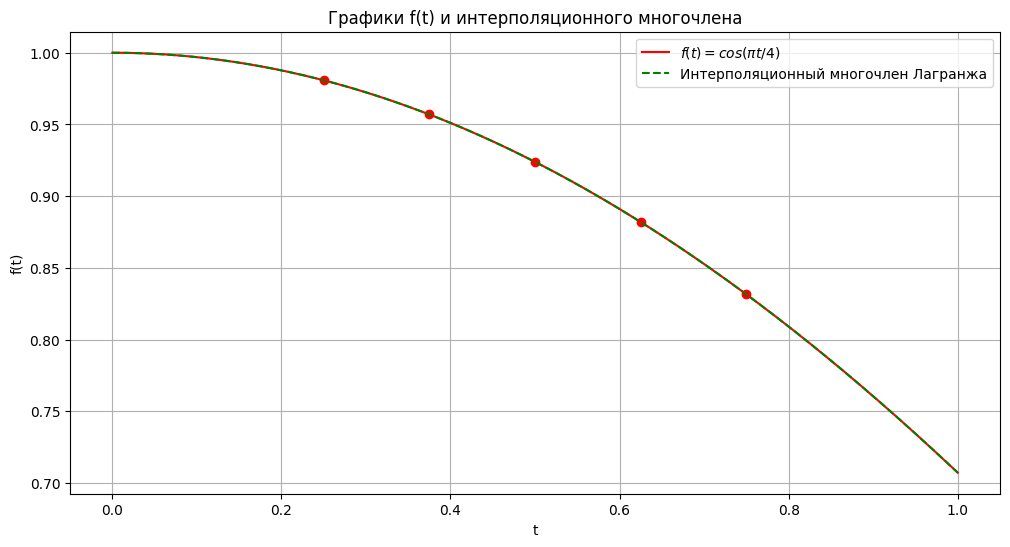

Максимальная ошибка многочлена Лагранжа: 0.000024
Максимальная ошибка линейной интерполяции: 0.028475


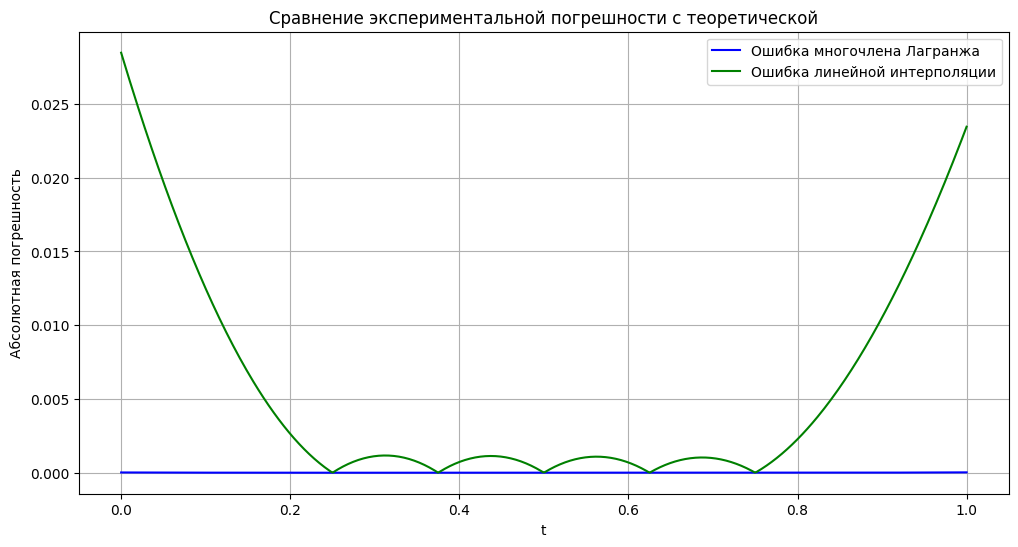

In [2]:
pol = lagrange(t_i, f_i) #интерполяционный многочлен Лагранжа
f_pol = pol(t_i)

print('Сравнение значений:')
print(' t_i  |   f(t_i)  |  f_int(t_i) | L(t_i) (Лагранж)')
for t,f_real,f_pol_val in zip(t_i,f_i,f_pol):
    f_interp = inter(t,t_i,f_i)
    print(f'{t:.3f} | {f_real:.6f}  | {f_interp:.6f}    | {f_pol_val:.6f}')

#графики
t_plot = np.linspace(0,1,500)
plt.figure(figsize=(12,6))
plt.plot(t_plot,f(t_plot),label='$f(t) = cos(\pi t / 4)$',color='red')
plt.plot(t_plot,pol(t_plot),label='Интерполяционный многочлен Лагранжа',color='green',linestyle='--')
plt.scatter(t_i,f_i,color='red')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Графики f(t) и интерполяционного многочлена')
plt.legend()
plt.grid(True)
plt.show()

error_pol = np.max(np.abs(f(t_plot) - pol(t_plot)))
print(f'Максимальная ошибка многочлена Лагранжа: {error_pol:.6f}')
error_interp = np.max(np.abs(f(t_plot) - f_int))
print(f'Максимальная ошибка линейной интерполяции: {error_interp:.6f}')

plt.figure(figsize=(12,6))
plt.plot(t_plot,np.abs(f(t_plot) - pol(t_plot)),label='Ошибка многочлена Лагранжа', color='blue')
plt.plot(t_plot,np.abs(f(t_plot) - f_int),label='Ошибка линейной интерполяции', color='green')
plt.xlabel('t')
plt.ylabel('Абсолютная погрешность')
plt.title('Сравнение экспериментальной погрешности с теоретической')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
p_2 = pol(2)
real_p_2 = f(2)
print(f'P(2) = {p_2:.6f}')
print(f'f(2) = {real_p_2:.6f}')

P(2) = 0.009981
f(2) = 0.000000


### Значение P(2) сильно отличается от f(2), потому что, косинус — периодическая функция, а полином — нет. При удалении от исходного интервала полином ведёт себя радикально иначе, также интерполяция использует только 5 точек на узком интервале [0.25,0.75], что недостаточно для предсказания поведения на t=2.
